In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import glauber 

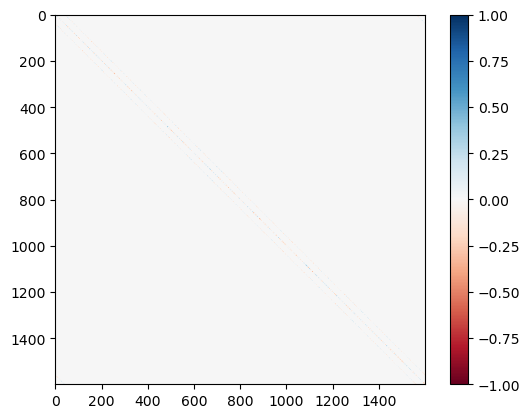

In [35]:
Lx = 40
Ly = 40

spins_initial = glauber.initialize_spins(Lx,Ly,random=False)

J_matrix = glauber.nn_coupling(-1.,Lx,Ly)
J_matrix = glauber.nn_coupling_random(-1.,0.5,Lx,Ly)
plt.imshow(J_matrix,cmap='RdBu')
plt.colorbar()
plt.show()
nTs = 10
Ts = np.linspace(0.1,4.,nTs)
mags = np.zeros_like(Ts)
nsteps = 10000



In [36]:
for i in range(nTs):
    spins = glauber.dynamics(spins_initial,nsteps,J_matrix,Ts[i])
    spins_initial = spins[:,-1]
    mags[i] = np.abs(np.mean(glauber.calc_mag(spins)[-200:-1:5]))

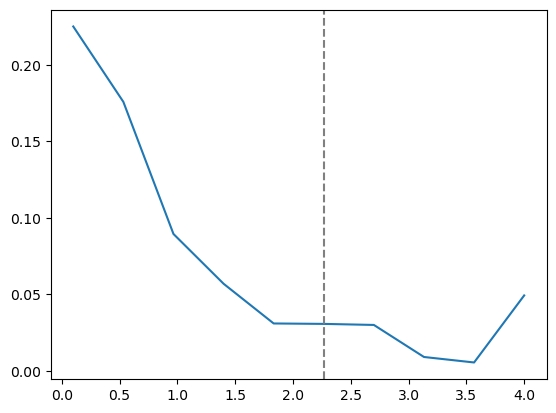

In [37]:
plt.plot(Ts,mags)
plt.axvline(2./np.log(1.+np.sqrt(2.)),linestyle='dashed',color='gray')
plt.show()

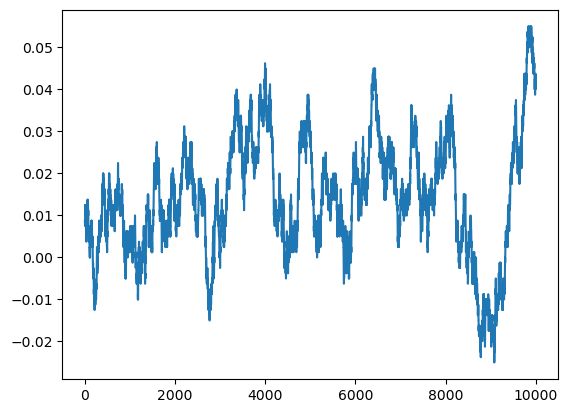

In [38]:
plt.plot(glauber.calc_mag(spins) )
plt.show()

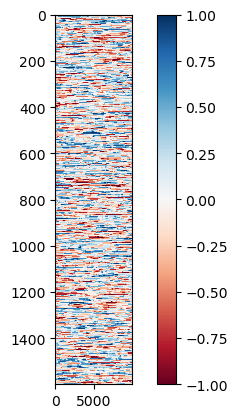

In [39]:
plt.imshow(spins,cmap='RdBu',aspect=30)
plt.colorbar()
plt.show()

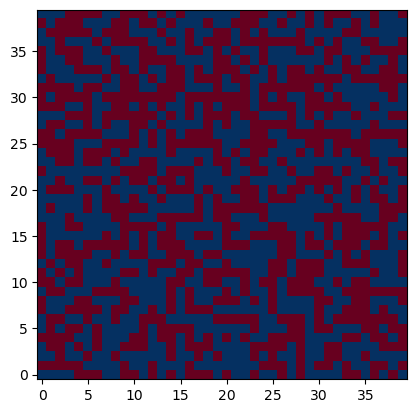

In [40]:
plt.imshow(spins[:,60].reshape(Lx,Ly),origin='lower',cmap='RdBu')
plt.show()